CIFAR10 models adopted from https://github.com/huyvnphan/PyTorch_CIFAR10

In [1]:
#  Colab only
from google.colab import drive
%matplotlib inline


drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Base Imports

In [2]:
import sys
import torch
from torchvision.datasets import CIFAR10, MNIST

PATH = "/content/drive/My Drive/Colab Notebooks/EECS553ML_reproduce/"
sys.path.append(PATH)

In [3]:
import dataset


dataset.MODEL = "ResNet-18"
DATA = MNIST
#DATA = CIFAR10

# Model

In [4]:
if DATA is CIFAR10:
    import PyTorch_CIFAR10.cifar10_models.resnet as resnet
    model = resnet.resnet18(pretrained=True)
else:
    import resnet18 as resnet
    model = resnet.ResNet18(size_for_cifar=False)
    model.load_state_dict(torch.load(PATH + "mnist_resnet18_model.t7"))

model.eval()

ResNet18(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fa

## Model Accuracy

In [5]:
#### Import data from Keras
import tensorflow.keras as keras
from dataset import Dataset


ds = Dataset(model, DATA)

In [6]:
print("Accuracy of the network on test images:", 
      ds.accuracy_pytorch())

Accuracy of the network on test images: 0.1438


In [7]:
print(f"Model accuracy:", ds.accuracy())

Model accuracy: 0.993


K = 8
Prediction time for batch size 8: 0.300515 seconds
100% completed
Time: 90.170059 seconds
K = 12
Prediction time for batch size 12: 0.426150 seconds
100% completed
Time: 128.217642 seconds


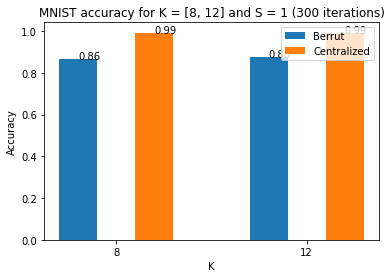

In [8]:
ds.plot_K(S=1, K_list=[8, 12])

K = 8
Prediction time for batch size 8: 0.324365 seconds
100% completed
Time: 97.673633 seconds


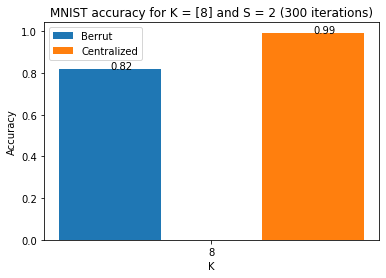

In [9]:
ds.plot_K(S=2)

K = 8
Prediction time for batch size 8: 0.356232 seconds
100% completed
Time: 96.557716 seconds


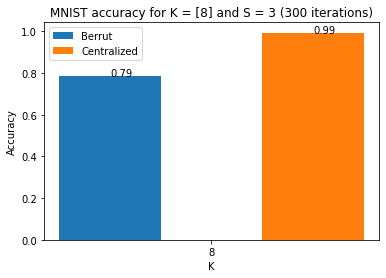

In [10]:
ds.plot_K(S=3)